In [1]:
# import the necessary packages
import argparse
import cv2
import matplotlib.pyplot as plt
import pytesseract
%matplotlib inline

In [2]:
path = "fotos/cotxe1.jpg"

In [3]:
def show_im(im, title="", cmap="gray"):
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap=cmap)
    plt.title(title)
    plt.show()

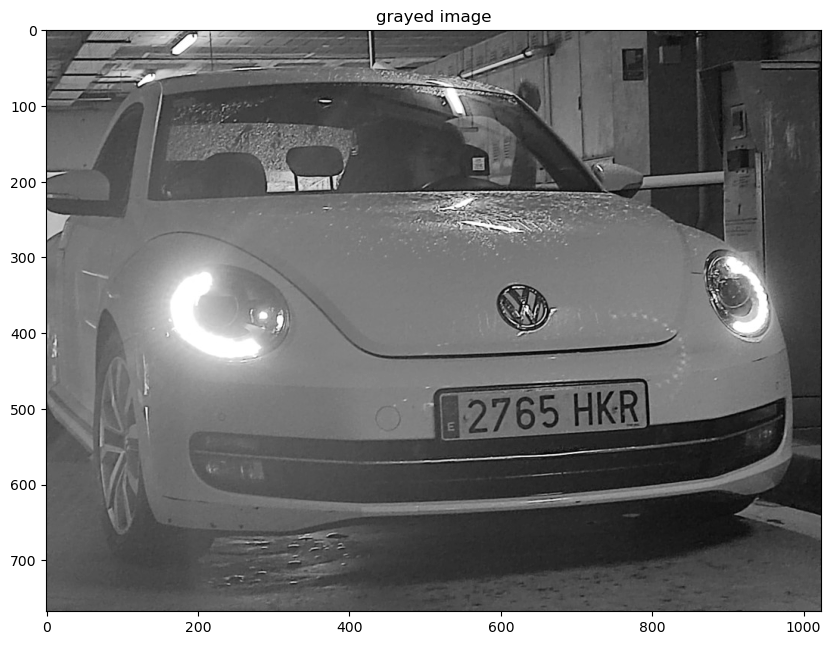

In [4]:
image = cv2.imread(path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_im(gray_image, "grayed image")


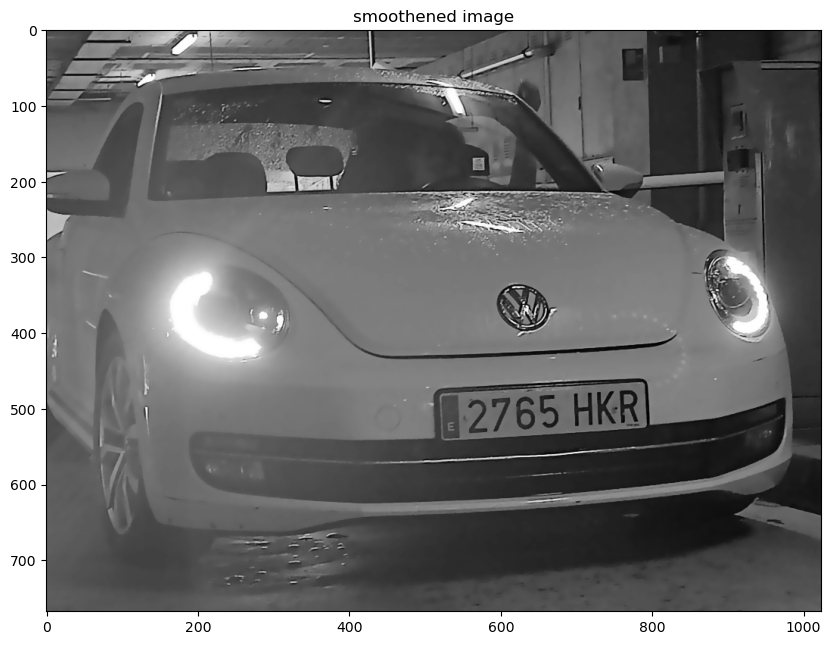

In [5]:
gray_image = cv2.bilateralFilter(gray_image, 11, 17, 17) 
show_im(gray_image,"smoothened image")

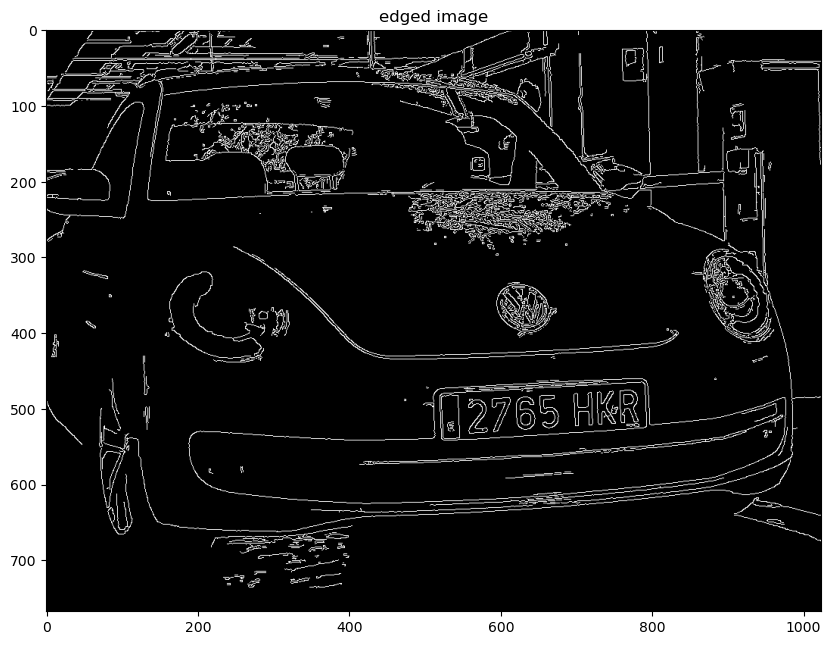

In [6]:
edged = cv2.Canny(gray_image, 30, 200) 
show_im(edged, "edged image")

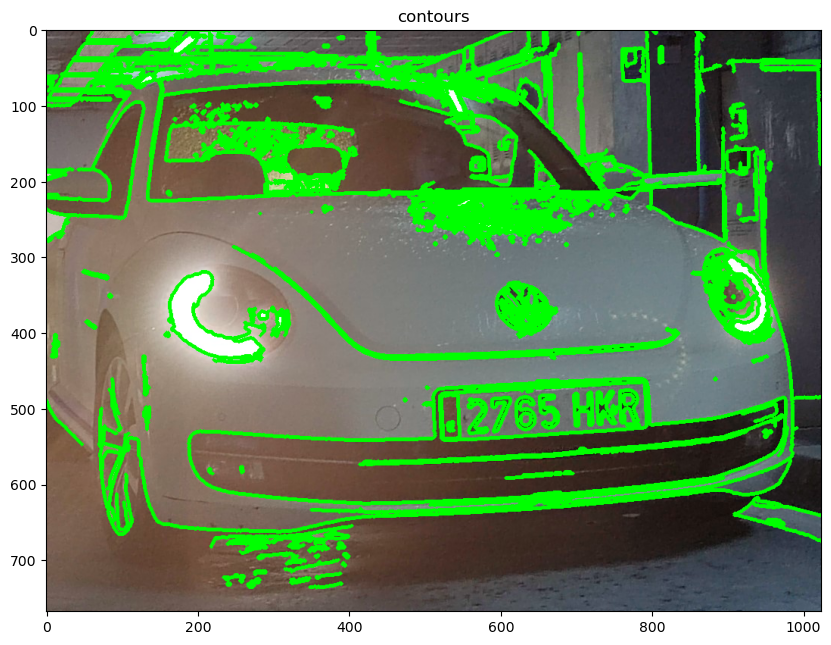

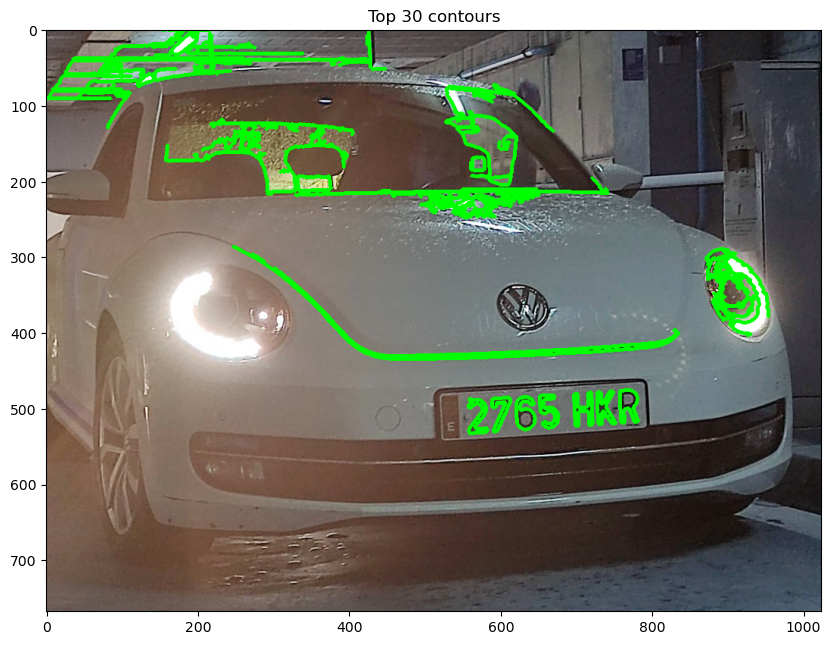

In [7]:
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image1=image.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
show_im(image1, "contours")

cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30]
screenCnt = None
image2 = image.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
show_im(image2, "Top 30 contours")
i=7
for c in cnts:        
	perimeter = cv2.arcLength(c, True)        
	approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)        	
	if len(approx) == 4:                 
		screenCnt = approx


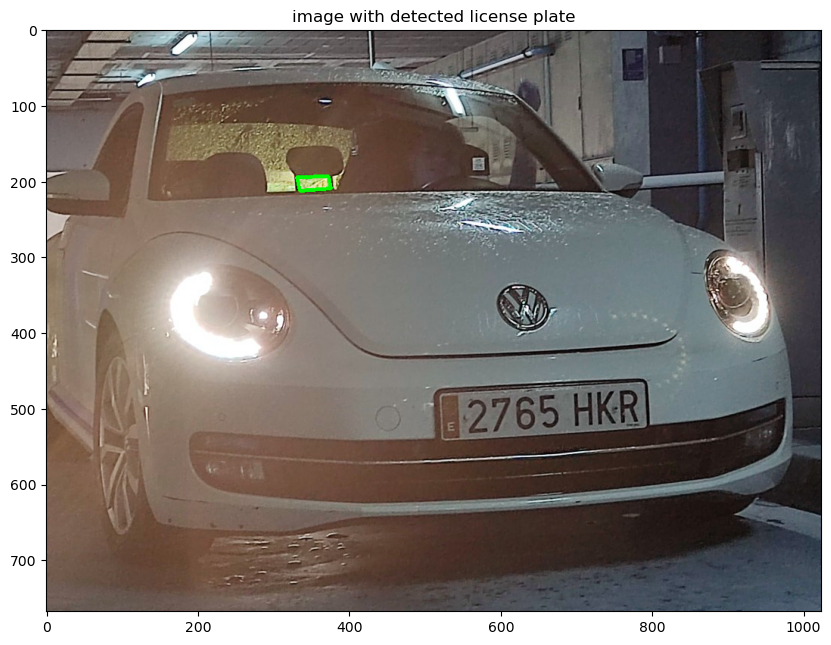

Number plate is: 


: 

In [9]:


cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3)
show_im(image,"image with detected license plate")
Cropped_loc = './fotos/cotxe1_cropped.jpg'
cv2.imshow("cropped", cv2.imread(Cropped_loc))
plate = pytesseract.image_to_string(Cropped_loc, lang='eng')
print("Number plate is:", plate)
